## **This program allows research teams to input patient data, analyze it for trends, and visualize results to aid in understanding treatment responses.**

✅How your program is structured

- Explain how you organized your code using **functions**, **loops**, and **conditionals**.
- Show how each part of your program **connects and interacts**.

✅ Why you chose a specific approach

- Why did you use dictionaries vs. **DataFrames**?
- If you used a **specific library** or method, why was it the best choice?

✅ How data flows through your program

- Clearly explain the **journey** of data from input → processing → output.
- Demonstrate how your **functions communicate** and pass data between them.


In [ ]:
import pandas as pd #import the library with all needed functions for the dataframe

In [ ]:
#1 Data Entry and Validation
def data_entry_form(): #call this function when you need to admitt a new patient
  while True:
    try:
      patientID = int(input('enter the patient ID: '))
      while True: #to try entering a new data correctly insted of runing the code from the start
        try:
          HR = float(input('enter the heart rate (bpm): '))
          if HR >= 220 or HR <= 30:
            raise ValueError('invalid input') #data validation to ensure the data is entered in a correct range
          break # Exit loop if valid
        except ValueError as e: # Ask for input again
          print(f"Invalid input for Heart Rate: {e}. Please try again.")

      while True:
        try:
          BP = input('enter the blood pressure (systolic/diastolic): ')
          if "/" not in BP:
            raise ValueError("the BP format is incorrect")
          break
        except ValueError as e:
          print(f"Invalid input for Heart Rate: {e}. Please try again.")

      while True:
        try:
          Cholesterol = float(input("Enter the cholesterol level (mg/dL): "))
          if Cholesterol >= 500 or Cholesterol <=50:
           raise ValueError('invalid input')
          break
        except ValueError as e:
          print(f"Invalid input for Heart Rate: {e}. Please try again.")

      while True:
        try:
          improvement_score = int(input('enter the improvement score (1-10): '))
          if improvement_score < 0 or improvement_score > 10:
            raise ValueError('invalid input')
          break
        except ValueError as e:
          print(f"Invalid input for Heart Rate: {e}. Please try again.")

      return {
          "patient ID": patientID,
          "Heart rate": HR,
          "Blood pressure":BP,
          "Cholesterol level":Cholesterol,
          "Improvement score":improvement_score}
    except ValueError as e:
      print(f'invalid input: {e}')

In [ ]:
#2 Data Storage
col= ["patient ID", "Heart rate", "Blood pressure", "Cholesterol level", "Improvement score"] #list with the dataframe column names
df = pd.DataFrame(columns=col)

In [ ]:
new = data_entry_form() # adding a new patient from the function into a varaible
df = pd.concat([df, pd.DataFrame([new])], ignore_index=True) #add as a new row to the column
print(df) #display
df

enter the patient ID: 2
enter the heart rate (bpm): 1000
Invalid input for Heart Rate: invalid input. Please try again.
enter the heart rate (bpm): 70
enter the blood pressure (systolic/diastolic): 0
Invalid input for Heart Rate: the BP format is incorrect. Please try again.
enter the blood pressure (systolic/diastolic): 12090
Invalid input for Heart Rate: the BP format is incorrect. Please try again.
enter the blood pressure (systolic/diastolic): 120/90
Enter the cholesterol level (mg/dL): 9
Invalid input for Heart Rate: invalid input. Please try again.
Enter the cholesterol level (mg/dL): 120
enter the improvement score (1-10): 7
  patient ID  Heart rate Blood pressure  Cholesterol level Improvement score
0          1        60.0          90/80              200.0                 4
1          2        70.0         120/90              120.0                 7


,patient ID,Heart rate,Blood pressure,Cholesterol level,Improvement score
0,1,60.0,90/80,200.0,4
1,2,70.0,120/90,120.0,7


In [ ]:
df

,patient ID,Heart rate,Blood pressure,Cholesterol level,Improvement score
0,1,60.0,90/80,200.0,4
1,2,70.0,120/90,120.0,7


In [ ]:
#3 Data analysis
df.describe() #shows the mean, count, standard deviation and more

,Heart rate,Cholesterol level
count,2.000000,2.000000
mean,65.000000,160.000000
std,7.071068,56.568542
min,60.000000,120.000000
25%,62.500000,140.000000
50%,65.000000,160.000000
75%,67.500000,180.000000
max,70.000000,200.000000


In [ ]:
def filter_group():
    df[['Systolic', 'Diastolic']] = df['Blood pressure'].str.split('/', expand=True).astype(float)
    grouped_df = df.groupby("Heart rate").agg({col: 'mean' for col in df.columns if col not in ['Blood pressure','patient ID']})  #numeric only
    print(grouped_df)

filter_group()

            Heart rate  Cholesterol level Improvement score  Systolic  \
Heart rate                                                              
60.0              60.0              200.0               4.0      90.0   
70.0              70.0              120.0               7.0     120.0   

            Diastolic  
Heart rate             
60.0             80.0  
70.0             90.0  


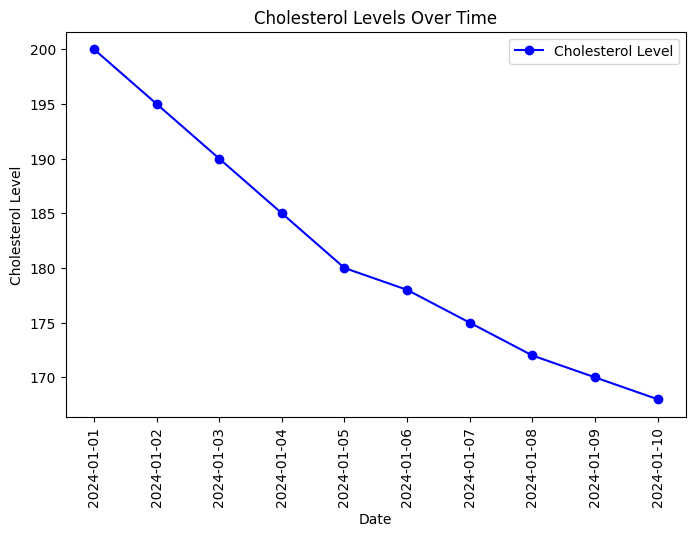

In [ ]:
#4 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#line plot

#example
data = {
    "Date": pd.date_range(start="2024-01-01", periods=10, freq="D"),  # 10-day period
    "Cholesterol_Level": [200, 195, 190, 185, 180, 178, 175, 172, 170, 168]  # Cholesterol trend
}

d=pd.DataFrame(data)

plt.figure(figsize=(8, 5))
plt.plot(d["Date"], d["Cholesterol_Level"], marker="o", color="blue", label="Cholesterol Level")
plt.xlabel("Date")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Levels Over Time")
plt.xticks(rotation=90)
plt.legend()

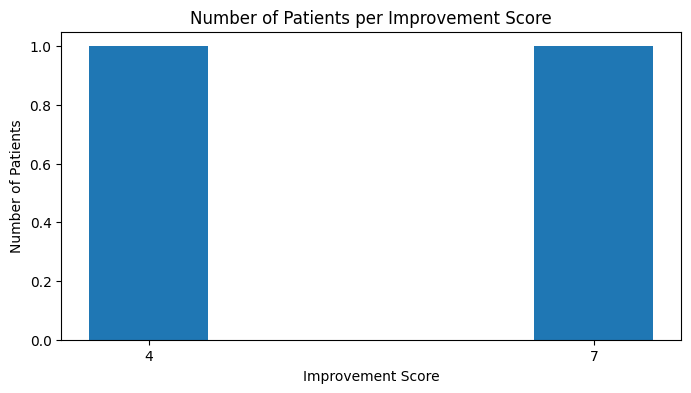

In [ ]:
#Bar chart
improvement_counts = df['Improvement score'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.bar(improvement_counts.index, improvement_counts.values)
plt.title('Number of Patients per Improvement Score')
plt.xlabel('Improvement Score')
plt.ylabel('Number of Patients')
plt.xticks(improvement_counts.index.astype(int))
plt.show()

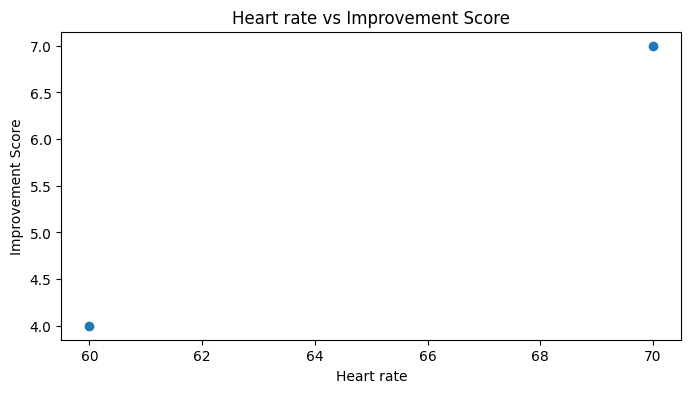

In [ ]:
#scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df['Heart rate'], df['Improvement score'])
plt.title('Heart rate vs Improvement Score')
plt.xlabel('Heart rate')
plt.ylabel('Improvement Score')
plt.show()

In [ ]:
#5 Data Export
df.to_csv("exported_data.csv", index=False)